In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os
import sys

l = logging.getLogger()
lh = logging.StreamHandler(sys.stdout)
l.addHandler(lh)
l.setLevel(logging.INFO)

import torch

import experiment
import cpn

# Vanilla case
#cfg = experiment.experiment.get_config(recover_after_lesion=False, coadapt=False, cuda="3")

# Co-adaptation case
#cfg = experiment.experiment.get_config(recover_after_lesion=False, coadapt=True, cuda="3")

# M1 lesion case
cfg = experiment.experiment.get_m1_lesion_config(cuda="3")


LOG_DIR = "/home/mbryan/coproc-poc/models"
my_coproc = cpn.CPN_EN_CoProc(cfg, log_dir=LOG_DIR)

In [ ]:
my_experiment = experiment.experiment.stage(my_coproc, cfg)

In [13]:
# Start running experiment; this and the next cell can be killed with
#  ctrl+c, and resumed with the cell below.

loss_history = my_experiment.run()

en 444585 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train_loss': '0.004345', 'pred_loss': '0.023141', 'pred_val_loss': '0.050000'}
en 444586 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train_loss': '0.004345', 'pred_loss': '0.020201', 'pred_val_loss': '0.050000'}
en 444587 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train_loss': '0.004345', 'pred_loss': '0.020201', 'pred_val_loss': '0.012734'}
en 444588 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train_loss': '0.004345', 'pred_loss': '0.015280', 'pred_val_loss': '0.012734'}
en 444589 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train_loss': '0.004345', 'pred_loss': '0.012983', 'pred_val_loss': '0.012734'}
en 444590 task_loss: 0.004459 pct_recov: 0.811 class_separation: -0.047 user: {'epoch_type': 'EN', 'train

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.92 GiB total capacity; 9.06 GiB already allocated; 4.31 MiB free; 9.89 GiB reserved in total by PyTorch)

In [ ]:
# Show me how I did, make pretty graphs, etc.
# TODO: this.
#experiment.score(my_experiment.loss_history)

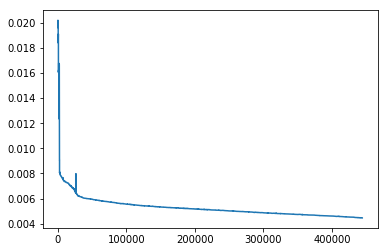

0.004457979928702116
0.8107711975223708


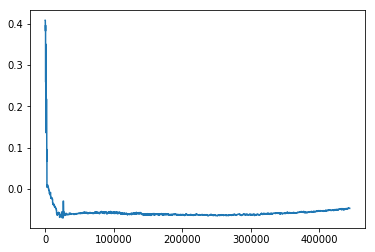

In [12]:
# TODO: experiment.score should be producing these
import matplotlib.pyplot as plt

lh = my_experiment.loss_history

task_losses = [r.task_loss for r in lh._recs if r.task_loss is not None]
plt.plot(task_losses)
plt.show()
print(min(task_losses))
print(lh.max_pct_recov)

class_sep = [r.class_separation for r in lh._recs if r.class_separation is not None]
plt.plot(class_sep)
plt.show()


In [6]:
my_experiment.loss_history.dump_to_file('blah.json')